## 라이브러리 불러오기

In [67]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime, timedelta

In [ ]:
# 코랩 한글 깨짐 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

## 네이버 영화 랭킹 - 평점순(현재 상영영화) 일별 페이지 불러오기

In [68]:
def get_week_score(sel, date):
    url = f"https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel={sel}&tg=0&date={date}"

    response = requests.get(url)

    table = pd.read_html(response.text)
    tmp = table[0]
    
    df = tmp[["영화명","평점.1"]]
    df = df.dropna()
    df = df.reset_index(drop=True)
    df.columns = ["영화", date]

    return df

In [ ]:
# 확인
sel = "cur"
date = "20220926"
get_week_score(sel, date)

## 네이버 영화 랭킹 - 평점순(현재 상영 영화) 주별 페이지 불러오기
- 9월 마지막주 (20220926 ~ 221002)까지 랭킹 불러오기

In [69]:
def get_total_rank(sel, date):
    rank = pd.DataFrame()

    date1 = datetime.strptime(date, "%Y%m%d")
    date2 = date1+timedelta(days = 6)

    # 종료일 까지 반복
    while date1 <= date2:
        dates = date1.strftime("%Y%m%d")
        df = get_week_score(sel, dates)

        if dates == date:
            rank = pd.concat([rank, df], axis = 1)
        else:
            rank = pd.merge(rank, df, how = 'outer', on = "영화")

        # 하루 더하기
        date1 += timedelta(days=1)  

    return rank

In [70]:
#확인
sel = "cur"
date = "20220926"
get_total_rank(sel, date)

,영화,20220926,20220927,20220928,20220929,20220930,20221001,20221002
0,탑건: 매버릭,9.77,9.77,9.77,9.77,9.77,9.77,9.77
1,인생은 뷰티풀: 비타돌체,9.74,9.73,9.73,9.73,9.73,9.73,9.73
2,명탐정 코난: 할로윈의 신부,9.47,9.47,9.47,9.47,9.47,9.47,9.47
3,극장판 주술회전 0,9.23,9.24,9.24,9.23,9.23,9.23,9.23
4,사랑은 비를 타고,9.21,9.20,9.21,9.22,9.22,9.21,9.22
5,코다,9.14,9.14,9.14,9.14,9.14,NaN,NaN
6,1917,8.90,8.90,NaN,NaN,NaN,NaN,NaN
7,중경삼림,8.89,8.89,8.89,8.89,8.89,8.89,8.89
8,엘비스,8.83,8.83,8.83,8.83,NaN,NaN,NaN
9,고양이를 부탁해,8.81,8.81,NaN,NaN,NaN,NaN,NaN


### 최종 데이터프레임

In [71]:
df = get_total_rank(sel, date)
df.head()

,영화,20220926,20220927,20220928,20220929,20220930,20221001,20221002
0,탑건: 매버릭,9.77,9.77,9.77,9.77,9.77,9.77,9.77
1,인생은 뷰티풀: 비타돌체,9.74,9.73,9.73,9.73,9.73,9.73,9.73
2,명탐정 코난: 할로윈의 신부,9.47,9.47,9.47,9.47,9.47,9.47,9.47
3,극장판 주술회전 0,9.23,9.24,9.24,9.23,9.23,9.23,9.23
4,사랑은 비를 타고,9.21,9.20,9.21,9.22,9.22,9.21,9.22


In [72]:
df.tail()

,영화,20220926,20220927,20220928,20220929,20220930,20221001,20221002
51,그린 나이트,NaN,NaN,7.22,7.22,7.22,7.22,7.22
52,정직한 후보2,NaN,NaN,7.15,5.45,5.37,5.59,5.72
53,미스비헤이비어,NaN,NaN,NaN,NaN,9.03,9.03,9.03
54,극장판 짱구는 못말려: 수수께끼! 꽃피는 천하 떡잎 학교,NaN,NaN,NaN,NaN,NaN,9.61,9.64
55,너의 췌장을 먹고 싶어,NaN,NaN,NaN,NaN,NaN,NaN,8.37


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

## EDA

#### 0. shape값 확인

In [73]:
df.shape

(56, 8)

In [74]:
df.count()

영화          56
20220926    37
20220927    47
20220928    49
20220929    48
20220930    47
20221001    47
20221002    48
dtype: int64

#### 1. 결측치확인

In [75]:
df.isnull().sum()

영화           0
20220926    19
20220927     9
20220928     7
20220929     8
20220930     9
20221001     9
20221002     8
dtype: int64

In [76]:
# 결측치 배율 구하기
df.isnull().mean()

영화          0.000000
20220926    0.339286
20220927    0.160714
20220928    0.125000
20220929    0.142857
20220930    0.160714
20221001    0.160714
20221002    0.142857
dtype: float64

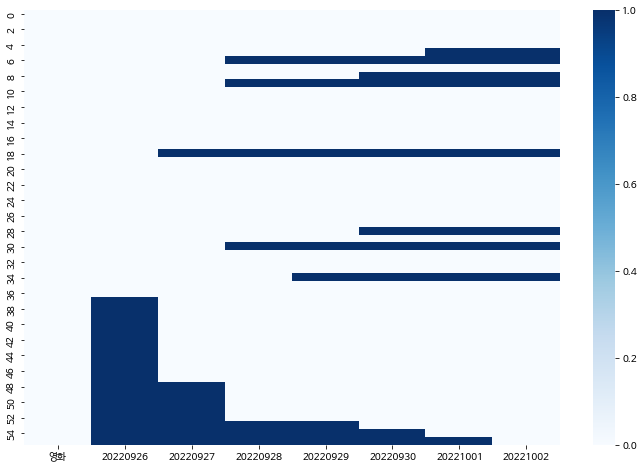

In [77]:
plt.figure(figsize = (12, 8))
sns.heatmap(df.isnull(), cmap = "Blues")

- 결측치는 해당일에 개봉되지 않은 미개봉작들이 포함되어 있기 때문이다. 
- 9월 27일에 개봉한 영화가 꽤 있음을 짐작할 수 있다. 

#### 2. 데이터타입 확인

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   영화        56 non-null     object 
 1   20220926  37 non-null     float64
 2   20220927  47 non-null     float64
 3   20220928  49 non-null     float64
 4   20220929  48 non-null     float64
 5   20220930  47 non-null     float64
 6   20221001  47 non-null     float64
 7   20221002  48 non-null     float64
dtypes: float64(7), object(1)
memory usage: 3.9+ KB


In [79]:
df.dtypes

영화           object
20220926    float64
20220927    float64
20220928    float64
20220929    float64
20220930    float64
20221001    float64
20221002    float64
dtype: object

#### 3. 기술통계

In [80]:
df.describe()

,20220926,20220927,20220928,20220929,20220930,20221001,20221002
count,37.000000,47.000000,49.000000,48.000000,47.000000,47.000000,48.000000
mean,8.267568,8.398723,8.393265,8.392292,8.406596,8.421277,8.424792
std,1.076374,1.020523,1.039514,1.082034,1.094759,1.089594,1.069327
min,4.330000,4.330000,4.330000,4.330000,4.340000,4.350000,4.380000
25%,7.960000,8.145000,8.120000,8.157500,8.180000,8.180000,8.185000
50%,8.570000,8.660000,8.650000,8.665000,8.680000,8.680000,8.660000
75%,8.810000,8.930000,8.980000,9.020000,9.085000,9.105000,9.067500
max,9.770000,9.770000,9.770000,9.770000,9.770000,9.770000,9.770000


#### 4. 전체수치변수에 대한 히스토그램


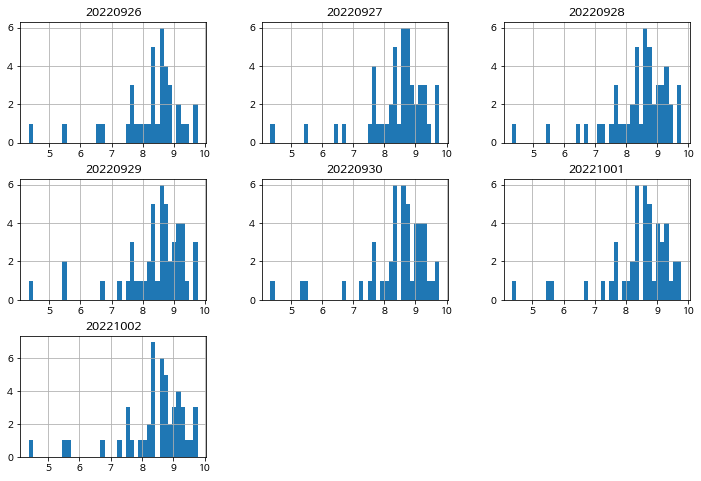

In [81]:
df.hist(figsize=(12, 8), bins = 40)
plt.show()

#### 5. 일자별 평점 빈도수

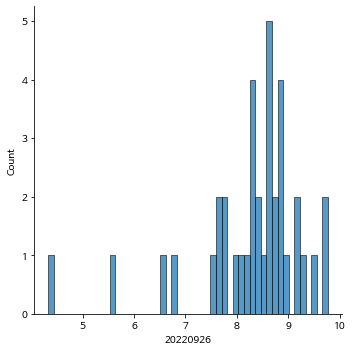

In [82]:
sns.displot(data = df, x = "20220926", bins = 50)

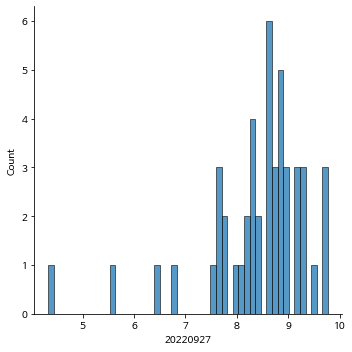

In [83]:
sns.displot(data = df, x = "20220927", bins = 50)

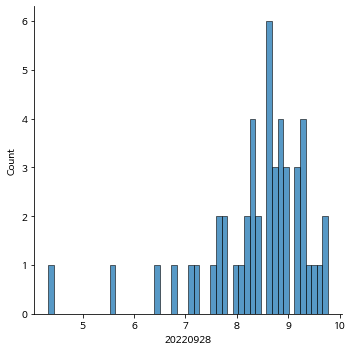

In [84]:
sns.displot(data = df, x = "20220928", bins = 50)

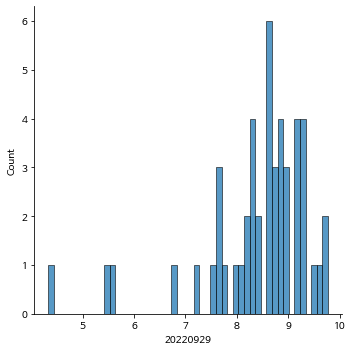

In [85]:
sns.displot(data = df, x = "20220929", bins = 50)

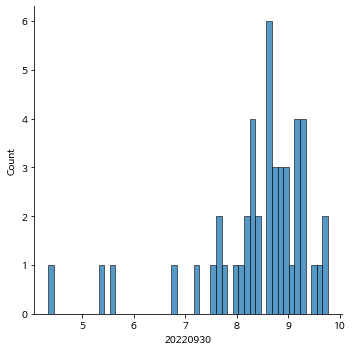

In [86]:
sns.displot(data = df, x = "20220930", bins = 50)

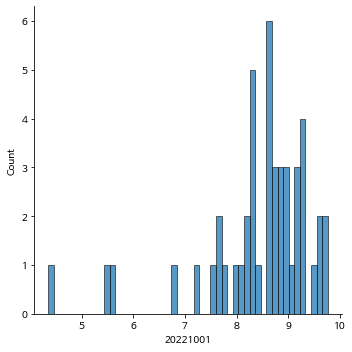

In [87]:
sns.displot(data = df, x = "20221001", bins = 50)

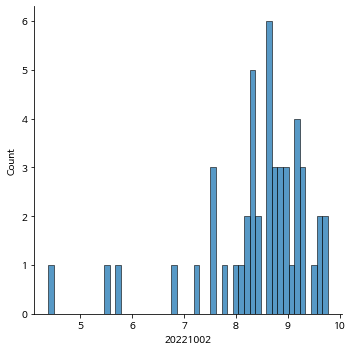

In [88]:
sns.displot(data = df, x = "20221002", bins = 50)

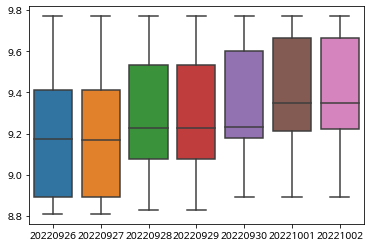

In [89]:
# 상위 10개 영화의 boxplot
sns.boxplot(data = df[:10])

#### 6. 일자별 평점에 대한 산점도 그래프

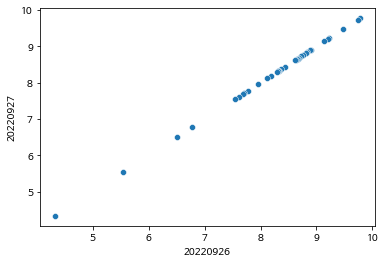

In [90]:
sns.scatterplot(data = df, x = "20220926", y = "20220927")

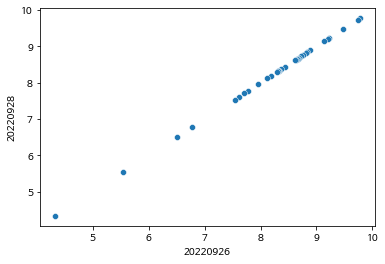

In [91]:
sns.scatterplot(data = df, x = "20220926", y = "20220928")

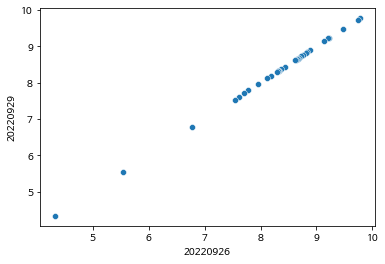

In [92]:
sns.scatterplot(data = df, x = "20220926", y = "20220929")

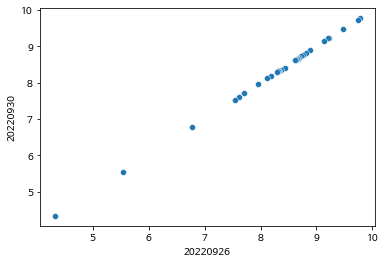

In [93]:
sns.scatterplot(data = df, x = "20220926", y = "20220930")

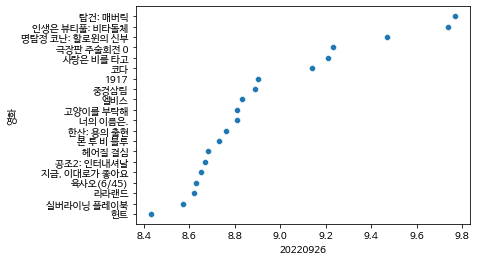

In [94]:
# 상위 20개 영화의 9월 26일 평점 산점도 그래프
sns.scatterplot(data = df[:20], x = "20220926", y = "영화")

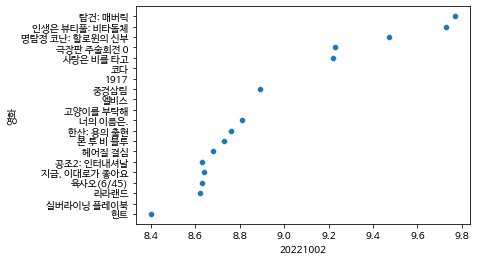

In [95]:
# 상위 20개 영화의 10월 2일 평점 산점도 그래프
sns.scatterplot(data = df[:20], x = "20221002", y = "영화")

#### 7. 영화 별 주간 평점 구하기

In [96]:
dff = df
dff["movie_week_rank"] = dff.mean(axis = 1).round(2)
dff.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,영화,20220926,20220927,20220928,20220929,20220930,20221001,20221002,movie_week_rank
0,탑건: 매버릭,9.77,9.77,9.77,9.77,9.77,9.77,9.77,9.77
1,인생은 뷰티풀: 비타돌체,9.74,9.73,9.73,9.73,9.73,9.73,9.73,9.73
2,명탐정 코난: 할로윈의 신부,9.47,9.47,9.47,9.47,9.47,9.47,9.47,9.47
3,극장판 주술회전 0,9.23,9.24,9.24,9.23,9.23,9.23,9.23,9.23
4,사랑은 비를 타고,9.21,9.20,9.21,9.22,9.22,9.21,9.22,9.21


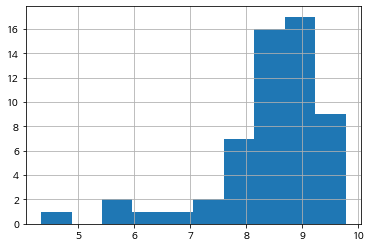

In [60]:
dff["movie_week_rank"].hist()

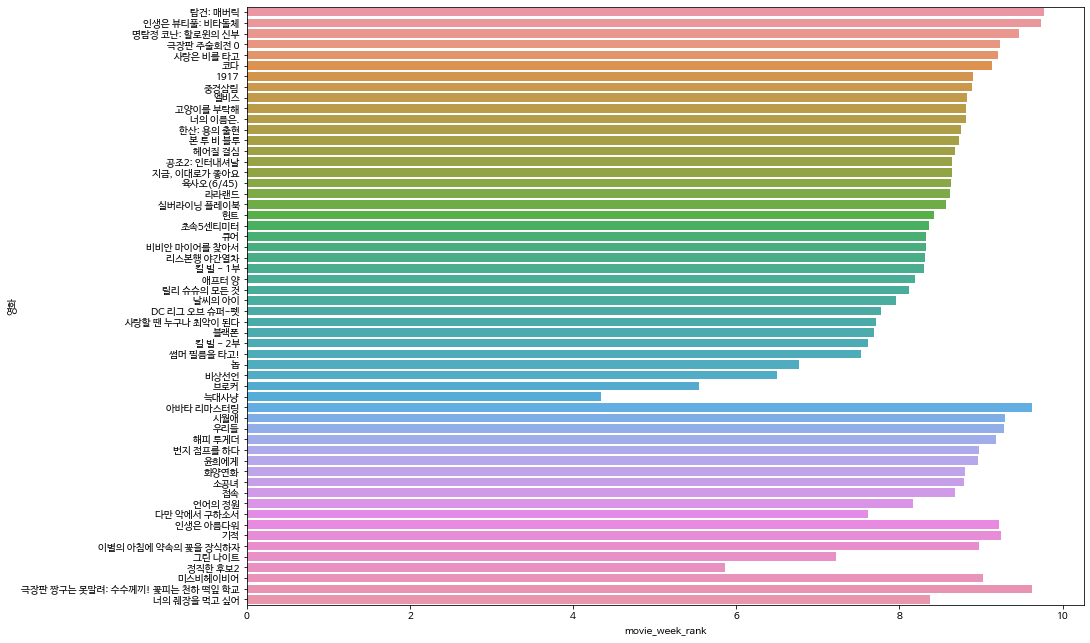

In [50]:
plt.figure(figsize=(15, 11))
sns.barplot(data = dff, y = "영화", x = "movie_week_rank")

#### 8. 주간 평점 평균 그룹 별 박스 플롯

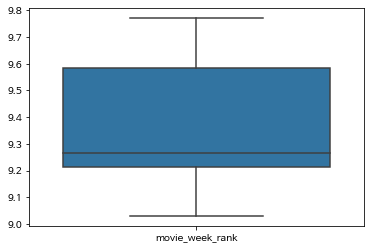

In [61]:
data = dff[dff["movie_week_rank"] >= 9.0][["영화", "movie_week_rank"]] # 주간 평점 평균이 9.0이상
sns.boxplot(data = data)

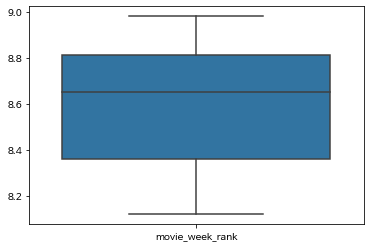

In [63]:
data = dff[(dff["movie_week_rank"] >= 8.0) & (dff["movie_week_rank"] < 9.0)][["영화", "movie_week_rank"]] # 주간 평점 평균이 8.0이상
sns.boxplot(data = data)

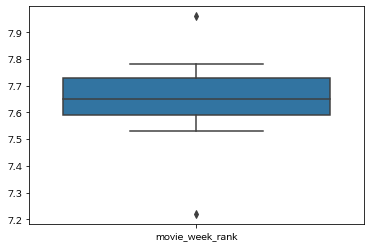

In [64]:
data = dff[(dff["movie_week_rank"] >= 7.0) & (dff["movie_week_rank"] < 8.0)][["영화", "movie_week_rank"]] #주간 평점 평균이 7.0이상
sns.boxplot(data = data)

#### 9. 막대그래프와 라인그래프를 사용한 상위 5개 영화에 대한 주간 평점 비교

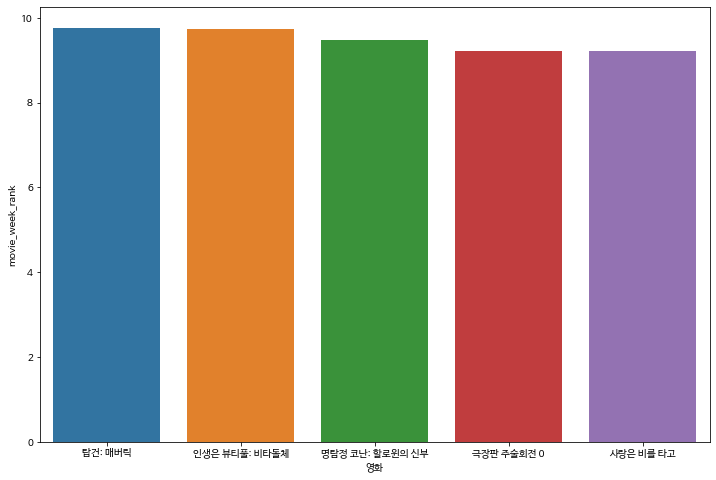

In [44]:
top_5= dff[:5]

plt.figure(figsize=(12, 8))
sns.barplot(data=top_5, x="영화", y="movie_week_rank")

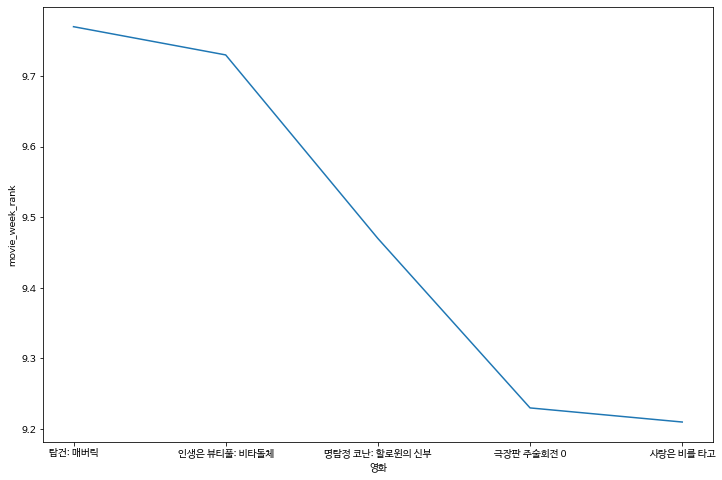

In [45]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=top_5, x="영화", y="movie_week_rank")

#### 10. relplot을 사용한 상위 20개 영화의 주간 평점 산점도

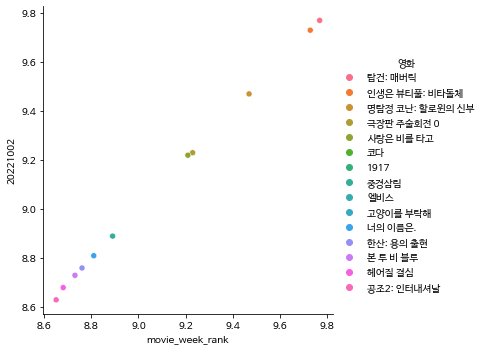

In [47]:
sns.relplot(data = dff[:15], x = "movie_week_rank", y = "20221002", hue = "영화")

#### 11. 9월 마지막주 모두 평점이 기록된 영화
- 9월 26일에 개봉된 영화이거나, 이미 개봉되어 있는 영화일 수 있다.

In [99]:
df.dropna()

,영화,20220926,20220927,20220928,20220929,20220930,20221001,20221002,movie_week_rank
0,탑건: 매버릭,9.77,9.77,9.77,9.77,9.77,9.77,9.77,9.77
1,인생은 뷰티풀: 비타돌체,9.74,9.73,9.73,9.73,9.73,9.73,9.73,9.73
2,명탐정 코난: 할로윈의 신부,9.47,9.47,9.47,9.47,9.47,9.47,9.47,9.47
3,극장판 주술회전 0,9.23,9.24,9.24,9.23,9.23,9.23,9.23,9.23
4,사랑은 비를 타고,9.21,9.20,9.21,9.22,9.22,9.21,9.22,9.21
7,중경삼림,8.89,8.89,8.89,8.89,8.89,8.89,8.89,8.89
10,너의 이름은.,8.81,8.81,8.81,8.81,8.81,8.81,8.81,8.81
11,한산: 용의 출현,8.76,8.76,8.76,8.76,8.76,8.76,8.76,8.76
12,본 투 비 블루,8.73,8.73,8.73,8.73,8.73,8.73,8.73,8.73
13,헤어질 결심,8.68,8.68,8.68,8.68,8.68,8.68,8.68,8.68


### 12. barplot을 통한 EDA 및 외부요인 찾아보기

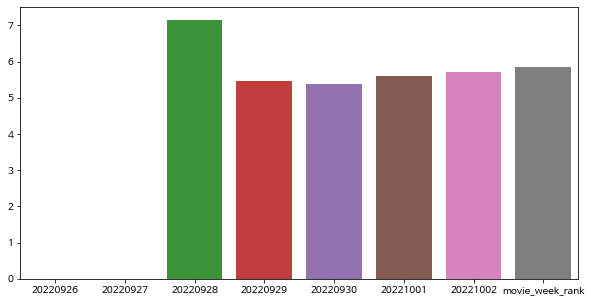

In [107]:
plt.figure(figsize=(10,5))
sns.barplot(data=dff[dff['영화'] == '정직한 후보2'])

- 조사 결과, 외부요인으로 인해 하루만에 평점이 약1.5점 감소한 것을 확인함

### 13. 행, 열 전환을 통한 EDA 

In [108]:
dff = dff.transpose()
dff.head()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
영화,탑건: 매버릭,인생은 뷰티풀: 비타돌체,명탐정 코난: 할로윈의 신부,극장판 주술회전 0,사랑은 비를 타고,코다,1917,중경삼림,엘비스,고양이를 부탁해,...,언어의 정원,다만 악에서 구하소서,인생은 아름다워,기적,이별의 아침에 약속의 꽃을 장식하자,그린 나이트,정직한 후보2,미스비헤이비어,극장판 짱구는 못말려: 수수께끼! 꽃피는 천하 떡잎 학교,너의 췌장을 먹고 싶어
20220926,9.77,9.74,9.47,9.23,9.21,9.14,8.9,8.89,8.83,8.81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20220927,9.77,9.73,9.47,9.24,9.2,9.14,8.9,8.89,8.83,8.81,...,8.17,7.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20220928,9.77,9.73,9.47,9.24,9.21,9.14,NaN,8.89,8.83,NaN,...,8.17,7.61,9.38,9.25,8.97,7.22,7.15,NaN,NaN,NaN
20220929,9.77,9.73,9.47,9.23,9.22,9.14,NaN,8.89,8.83,NaN,...,8.17,7.61,9.17,9.25,8.97,7.22,5.45,NaN,NaN,NaN


- 데이터에 따라 행과 열을 바꿔서 분석도 가능함